## Simulate linear regression data and run linear regression on data

In [26]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# simulate linear regression data
def regression_simulation(sim_var, sim_error, sim_coef, size):
    
    '''
        Simulates data for simple linear regression.
        
        inputs:
            sim_var (list)    : 2-element list, first element is the mean of a random variable
                                that is being used to simulate a feature in the linear regression, 
                                second is the standard deviation
            sim_error (list)   : 2-element list, first element is the mean of random error being added,
                                 second is the standard deviation
            sim_coef (float)   : impact of the random variable established by sim_var on the target 
                                 variable
            size (int)         : number of units to simulate
            
        output:
            sim_df (DataFrame) : dataframe with simulated data
        
    '''
    
    # create an empty dataframe to populate
    sim_df = pd.DataFrame()

    # create the feature for the linear regression
    sim_df['var'] = np.random.normal(sim_var[0], sim_var[1], size = size)
    
    # multiply feature by the coef to get a simulated impact
    sim_df['var_impact'] = sim_df['var']*sim_coef
    
    # create error for the linear regression
    sim_error = np.random.normal(sim_error[0], sim_error[1], size = size)
    
    # create the target variable
    sim_df['target'] = sim_df['var_impact'] + sim_error
    
    return sim_df


In [31]:
linear_regression_sim_df = regression_simulation(sim_var = [2, 0.2], 
                                                 sim_error = [0, 2],
                                                 sim_coef = 0.16,
                                                 size = 30000)
    
lin_reg = LinearRegression()
X = np.array(linear_regression_sim_df['var']).reshape(-1, 1)
y = linear_regression_sim_df['target']
lin_reg.fit(X, y)

LinearRegression()

In [34]:
lin_reg.coef_

array([0.17080146])

(array([  4.,   2.,  11.,   8.,  22.,  45.,  52.,  85., 109., 129., 100.,
        104., 104.,  89.,  55.,  42.,  17.,  14.,   4.,   4.]),
 array([0.13786543, 0.14001128, 0.14215712, 0.14430297, 0.14644881,
        0.14859466, 0.1507405 , 0.15288635, 0.15503219, 0.15717804,
        0.15932388, 0.16146973, 0.16361557, 0.16576142, 0.16790727,
        0.17005311, 0.17219896, 0.1743448 , 0.17649065, 0.17863649,
        0.18078234]),
 <BarContainer object of 20 artists>)

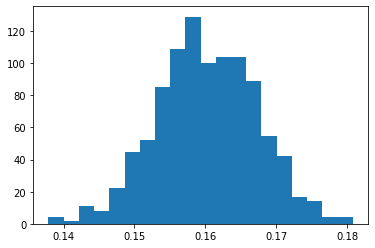

In [33]:
# run multiple simulations
iters = 1000
coef_list = []

for i in range(iters):
    
    reg_sim_df = regression_simulation([2, 0.2], [0, 0.1], 0.16, 5000)
    
    lin_reg = LinearRegression()
    X = np.array(reg_sim_df['var']).reshape(-1, 1)
    y = reg_sim_df['target']
    lin_reg.fit(X, y)
    
    coef = lin_reg.coef_[0]
    
    coef_list.append(coef)
    

plt.hist(coef_list, bins = 20)

## Simulate binary data and run logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# simulate binary data
def logistic_regression_simulation(sim_var, sim_error, sim_coef, size):
    
    '''
        Simulates data for simple logistic regression.
        
        inputs:
            sim_var (list)    : 2-element list, first element is the mean of a random variable
                                that is being used to simulate a feature in the logistic regression, 
                                second is the standard deviation
            sim_error (list)   : 2-element list, first element is the mean of random error being added,
                                 second is the standard deviation
            sim_coef (float)   : impact of the random variable established by sim_var on the target 
                                 variable
            size (int)         : number of units to simulate
            
        output:
            sim_df (DataFrame) : dataframe with simulated data
        
    '''
    
    # create an empty dataframe to populate
    sim_df = pd.DataFrame()
    
    # create the feature for the linear regression
    sim_df['var'] = np.random.normal(sim_var[0], sim_var[1], size = size)
    
    # multiply feature by the coef to get a simulated impact
    sim_df['var_impact'] = sim_df['var']*sim_coef
    
    # create error term
    sim_df['sim_error'] = np.random.normal(sim_error[0], sim_error[1], size = size)
    
    # add error and impact together
    sim_df['sum_vars_error'] = sim_df['var_impact'] + sim_df['sim_error']
    
    # create a uniform random variable used to convert sum_vars_error from continuous to binary
    sim_df['uniform_rv'] = np.random.uniform(size = len(sim_df))
    
    # create the binary target variable using the uniform random variable
    sim_df['binary_target'] = sim_df.apply(lambda x : 1 if x.uniform_rv < x.sum_vars_error else 0, axis = 1)
    
    return sim_df
    

In [36]:
log_reg_sim_df = logistic_regression_simulation([2, 0.2], [0, 0.1], 0.16, 30000)

log_reg = LogisticRegression()
X = np.array(log_reg_sim_df['var']).reshape(-1, 1)
y = log_reg_sim_df['binary_target']
log_reg.fit(X, y)

LogisticRegression()

In [37]:
log_reg.coef_[0]

array([0.7274772])

In [38]:
coef = log_reg.coef_[0][0]
intercept = log_reg.intercept_[0]
log_reg_sim_df['contribution'] = log_reg_sim_df['var'].apply(lambda x : coef*exp(intercept + (x*coef))/(((exp(intercept + (x*coef)) + 1))**2))

In [39]:
log_reg_sim_df['contribution'].mean()

0.1579768145336383

(array([  3.,   6.,  10.,  24.,  48.,  83.,  98., 125., 136., 147.,  97.,
        100.,  61.,  26.,  13.,  17.,   2.,   2.,   1.,   1.]),
 array([0.11115655, 0.11677681, 0.12239707, 0.12801733, 0.13363759,
        0.13925785, 0.14487811, 0.15049837, 0.15611863, 0.16173889,
        0.16735915, 0.17297941, 0.17859967, 0.18421993, 0.18984019,
        0.19546045, 0.20108071, 0.20670097, 0.21232123, 0.21794149,
        0.22356174]),
 <BarContainer object of 20 artists>)

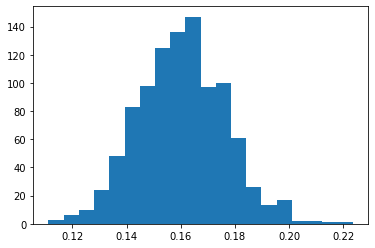

In [40]:
from math import exp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

iters = 1000
mean_marginal_impacts = []
coef_list = []

for i in range(iters):
    
    log_reg_sim_df = logistic_regression_simulation([2, 0.2], [0, 0.1], 0.16, 20000)
    
    log_reg = LogisticRegression()
    X = np.array(log_reg_sim_df['var']).reshape(-1, 1)
    y = log_reg_sim_df['binary_target']
    log_reg.fit(X, y)
    
    coef = log_reg.coef_[0][0]
    intercept = log_reg.intercept_[0]
    
    # run the model outputs through the partial derivatives for each simulated observation
    log_reg_sim_df['contribution'] = log_reg_sim_df['var'].apply(lambda x : coef*exp(intercept + (x*coef))/
                                                                         (((exp(intercept + (x*coef)) + 1))**2))
    
    temp_mean_marginal_impact = log_reg_sim_df['contribution'].mean()
    
    mean_marginal_impacts.append(temp_mean_marginal_impact)
    coef_list.append(coef)

plt.hist(mean_marginal_impacts, bins = 20)

In [41]:
np.mean(mean_marginal_impacts)

0.16038391795891555

(array([  2.,   6.,  10.,  21.,  44.,  87.,  91., 123., 133., 139., 115.,
         99.,  63.,  28.,  15.,  17.,   2.,   2.,   2.,   1.]),
 array([0.50903276, 0.5351542 , 0.56127564, 0.58739708, 0.61351852,
        0.63963996, 0.6657614 , 0.69188284, 0.71800428, 0.74412572,
        0.77024716, 0.7963686 , 0.82249004, 0.84861148, 0.87473292,
        0.90085436, 0.9269758 , 0.95309725, 0.97921869, 1.00534013,
        1.03146157]),
 <BarContainer object of 20 artists>)

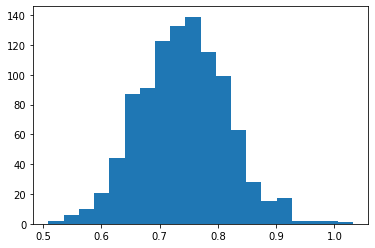

In [42]:
plt.hist(coef_list, bins = 20)

## Run logistic regression with statsmodels.Logit, calculate mean marginal effect with built-in method

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

iters = 1000
sm_marginal_effects = []

for i in range(iters):
    
    # simulate data
    log_reg_sim_df = logistic_regression_simulation([2, 0.2], [0, 0.1], 0.16, 20000)
    
    # define target and predictor variables
    X = np.array(log_reg_sim_df['var'])
    y = log_reg_sim_df['binary_target']
    
    # add constant to formula - statsmodels.Logit doesn't automatically include
    # an intercept like sklearn
    X_with_intercept = sm.add_constant(X)
    log_reg_sm = sm.Logit(y, X_with_intercept)
    result = log_reg_sm.fit(disp=False)
    
    # calculate marginal effects
    marginal_effects = result.get_margeff(at = 'all', method = 'dydx')
    
    # save mean marginal effects in a list
    sm_marginal_effects.append(np.mean(marginal_effects.margeff))



In [44]:
np.mean(sm_marginal_effects)

0.16012230355793572

(array([  5.,   6.,   7.,  19.,  34.,  55.,  61.,  88., 110., 140., 133.,
        112.,  77.,  57.,  39.,  24.,  18.,   6.,   5.,   4.]),
 array([0.11060163, 0.11566439, 0.12072715, 0.12578991, 0.13085267,
        0.13591543, 0.14097819, 0.14604095, 0.15110371, 0.15616647,
        0.16122923, 0.16629199, 0.17135475, 0.17641751, 0.18148027,
        0.18654303, 0.19160579, 0.19666855, 0.20173131, 0.20679407,
        0.21185683]),
 <BarContainer object of 20 artists>)

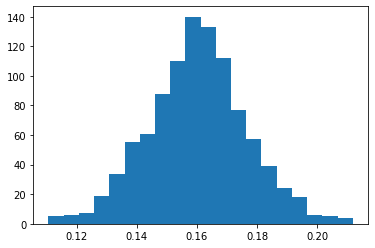

In [45]:
plt.hist(sm_marginal_effects, bins = 20)